In [69]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [70]:
def normalize(data):
    y = pd.to_numeric(data)
    y = np.array(y.reshape(-1, 1))
    
    scaler = MinMaxScaler()
    y = scaler.fit_transform(y)
    y = y.reshape(1, -1)[0]
    return y

In [71]:
# Read the dataset
ROAD = "Taft Ave."
YEAR = "2015"
EXT = ".csv"
FILENAME = "merged_mmda_wwo_" + ROAD + "_" + YEAR
road = pd.read_csv("data/thesis_dataset/" + FILENAME + EXT, skipinitialspace=True)

traffic = {'statusS-1':road.statusS, 'statusS-2':road.statusS, 'statusN-1':road.statusN, 'statusN-2':road.statusN}

traffic = pd.DataFrame(data=traffic)
traffic['statusS-1'] = normalize(traffic['statusS-1'])
traffic['statusS-2'] = normalize(traffic['statusS-2'])
traffic['statusN-1'] = normalize(traffic['statusN-1'])
traffic['statusN-2'] = normalize(traffic['statusN-2'])
traffic.head()

c:\users\ronnie nieva\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,statusN-1,statusN-2,statusS-1,statusS-2
0,0.3,0.3,0.3,0.3
1,0.3,0.3,0.3,0.3
2,0.3,0.3,0.3,0.3
3,0.3,0.3,0.3,0.3
4,0.3,0.3,0.3,0.3


In [72]:
def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

In [73]:
lags = 500
ncorr = []
scorr = []

for i in range(0, lags):
    traffic_shifted = df_shifted(traffic, 'statusS-1', lag=-i)
    traffic_shifted = df_shifted(traffic_shifted, 'statusN-1', lag=-i)
    print("Lag: " + str(i))
    south_corr = traffic_shifted.corr().iloc[2, 3]
    north_corr = traffic_shifted.corr().iloc[0, 1]
    print("North: " + str(north_corr))
    print("South: " + str(south_corr))
    print("\n")
    ncorr.append(north_corr)
    scorr.append(south_corr)    

Lag: 0
North: 1.0
South: 1.0


Lag: 1
North: 0.9712849679201624
South: 0.9602832912717095


Lag: 2
North: 0.9431303168187144
South: 0.9207029629864814


Lag: 3
North: 0.9149862260004467
South: 0.8815401638716777


Lag: 4
North: 0.8870827627882609
South: 0.8418554872594072


Lag: 5
North: 0.8596733656480431
South: 0.8019610695836684


Lag: 6
North: 0.8330614304391514
South: 0.761928214625218


Lag: 7
North: 0.8075453870940102
South: 0.721675305567375


Lag: 8
North: 0.7825853653374325
South: 0.6815855507492498


Lag: 9
North: 0.7576729736391068
South: 0.6412977647152526


Lag: 10
North: 0.7335352130080135
South: 0.6012375967703149


Lag: 11
North: 0.7096124749273001
South: 0.5610404929269418


Lag: 12
North: 0.6858798330892021
South: 0.5203652811285638


Lag: 13
North: 0.6622780170240635
South: 0.4795870862699519


Lag: 14
North: 0.6385401733819499
South: 0.43941921200643336


Lag: 15
North: 0.6150914286456991
South: 0.4007750407997264


Lag: 16
North: 0.5925968689611599
South: 0.363248

Lag: 135
North: 0.03344401000352627
South: -0.12814286682233691


Lag: 136
North: 0.029839223646049306
South: -0.13146039916829708


Lag: 137
North: 0.02683783711805159
South: -0.1345074012765421


Lag: 138
North: 0.023942710742872308
South: -0.13673548280113285


Lag: 139
North: 0.021236597864326336
South: -0.13871324384429484


Lag: 140
North: 0.01891897585522804
South: -0.14077079627885647


Lag: 141
North: 0.01719642856039078
South: -0.14238090465790396


Lag: 142
North: 0.016043833389114595
South: -0.14409268486736843


Lag: 143
North: 0.015307283267203058
South: -0.14484217033569277


Lag: 144
North: 0.014860604905096851
South: -0.14538929288785565


Lag: 145
North: 0.014871375695654101
South: -0.14574073743429677


Lag: 146
North: 0.015034097916814086
South: -0.1457000809462872


Lag: 147
North: 0.015586221225471222
South: -0.1456951226808304


Lag: 148
North: 0.016131258449173173
South: -0.14535263248559194


Lag: 149
North: 0.016911710728386764
South: -0.1446241493793654


Lag

North: 0.14411646928841243
South: 0.15834584227980855


Lag: 277
North: 0.14878120571118944
South: 0.17947361560547012


Lag: 278
North: 0.15343175243071874
South: 0.1994103566371295


Lag: 279
North: 0.15801477745689957
South: 0.21874356469415798


Lag: 280
North: 0.16205663839139342
South: 0.23685120864763923


Lag: 281
North: 0.1661617178999482
South: 0.2536807351369868


Lag: 282
North: 0.1703947797446643
South: 0.26952106051333635


Lag: 283
North: 0.174725354541288
South: 0.2839019124116971


Lag: 284
North: 0.1785185049546589
South: 0.2973788491426935


Lag: 285
North: 0.18102758783598982
South: 0.30861247168482214


Lag: 286
North: 0.1829103437660563
South: 0.316759148846004


Lag: 287
North: 0.18442432825564273
South: 0.32146179328210134


Lag: 288
North: 0.1851834351938168
South: 0.323108475945487


Lag: 289
North: 0.18440527488454042
South: 0.32009683060147764


Lag: 290
North: 0.18237804661513382
South: 0.3126626610437531


Lag: 291
North: 0.17990690141876667
South: 0.30319


Lag: 408
North: 0.04503353913817723
South: -0.07217353714325819


Lag: 409
North: 0.03757819008285012
South: -0.08146533944860031


Lag: 410
North: 0.03030213957965788
South: -0.08967899615504767


Lag: 411
North: 0.023138555657757413
South: -0.09672954873072237


Lag: 412
North: 0.01662851909633254
South: -0.10277455891400553


Lag: 413
North: 0.0107134906993591
South: -0.10856390871794651


Lag: 414
North: 0.005885149023774089
South: -0.11385054031608574


Lag: 415
North: 0.0010944197567483885
South: -0.11840526520668374


Lag: 416
North: -0.0040452138474143945
South: -0.12291241243859148


Lag: 417
North: -0.009025539503969742
South: -0.12685296039997684


Lag: 418
North: -0.013598890612014069
South: -0.13009795066000795


Lag: 419
North: -0.017992960831878412
South: -0.13293902305072375


Lag: 420
North: -0.021771006013949074
South: -0.13607720096701034


Lag: 421
North: -0.025236588092658177
South: -0.13856707733061274


Lag: 422
North: -0.028639265510424835
South: -0.14050805996

In [74]:
d = {'S-Corr': scorr, 'N-Corr': ncorr, 'Lag': range(0, lags), }

df = pd.DataFrame(data=d)
df.head()

,Lag,N-Corr,S-Corr
0,0,1.000000,1.000000
1,1,0.971285,0.960283
2,2,0.943130,0.920703
3,3,0.914986,0.881540
4,4,0.887083,0.841855


In [85]:
df.to_csv("stats/autocorr_" + FILENAME + EXT, encoding='utf-8', index=False)

## Visualize Correlations

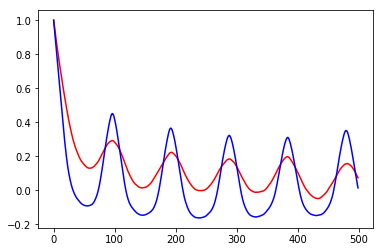

In [86]:
import matplotlib.pyplot as plt
plt.plot(ncorr, color="red")
plt.plot(scorr, color="blue")
plt.show()